In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [40]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Crop_recommendation (1).csv")

In [41]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [42]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
print("Number of various crops: ", len(data['label'].unique()))
print("List of crops: ", data['label'].unique())

Number of various crops:  22
List of crops:  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [8]:
print(data['N'].describe())

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64


In [9]:
print(data['P'].describe())

count    2200.000000
mean       53.362727
std        32.985883
min         5.000000
25%        28.000000
50%        51.000000
75%        68.000000
max       145.000000
Name: P, dtype: float64


In [10]:
print(data['K'].describe())

count    2200.000000
mean       48.149091
std        50.647931
min         5.000000
25%        20.000000
50%        32.000000
75%        49.000000
max       205.000000
Name: K, dtype: float64


In [11]:
print(data['ph'].describe())

count    2200.000000
mean        6.469480
std         0.773938
min         3.504752
25%         5.971693
50%         6.425045
75%         6.923643
max         9.935091
Name: ph, dtype: float64


In [12]:
print(data['temperature'].describe())

count    2200.000000
mean       25.616244
std         5.063749
min         8.825675
25%        22.769375
50%        25.598693
75%        28.561654
max        43.675493
Name: temperature, dtype: float64


In [13]:
print(data['rainfall'].describe())

count    2200.000000
mean      103.463655
std        54.958389
min        20.211267
25%        64.551686
50%        94.867624
75%       124.267508
max       298.560117
Name: rainfall, dtype: float64


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [15]:
data[['N', 'P', 'K']] = data[['N', 'P', 'K']].astype(float)

In [16]:
data['label'] = pd.Categorical(data['label'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   float64 
 1   P            2200 non-null   float64 
 2   K            2200 non-null   float64 
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   category
dtypes: category(1), float64(7)
memory usage: 123.3 KB


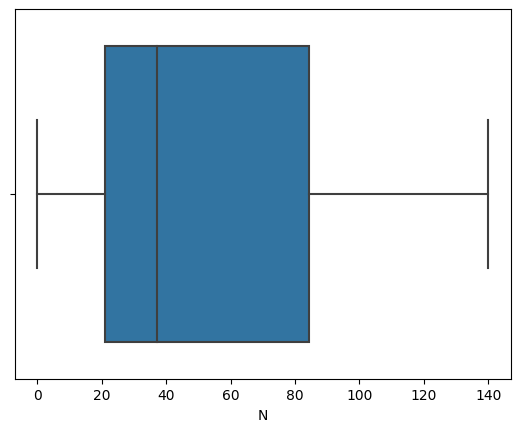

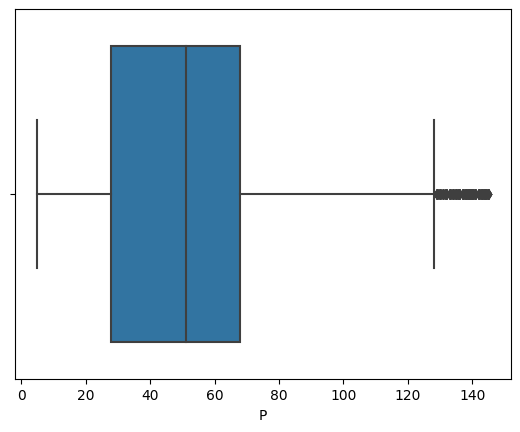

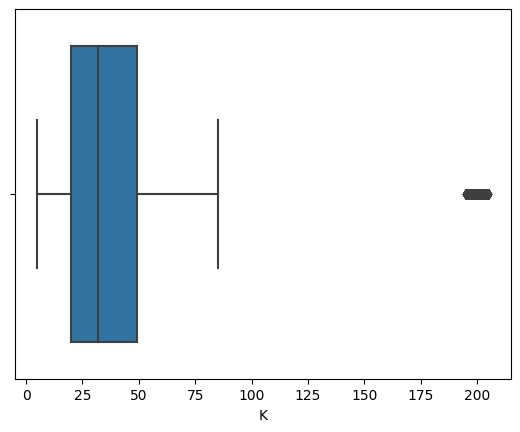

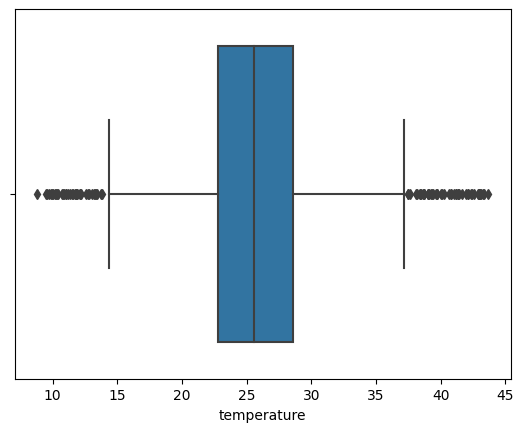

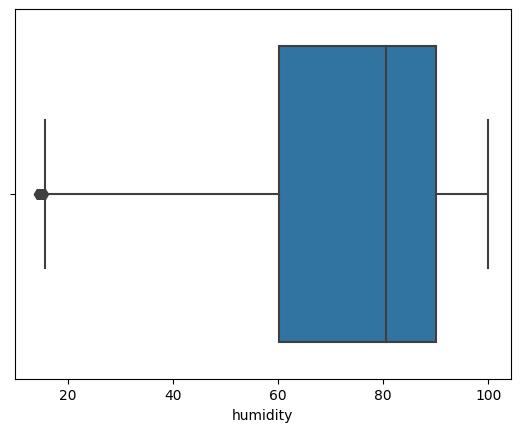

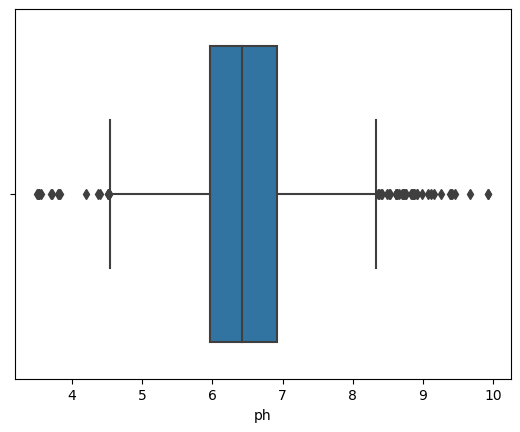

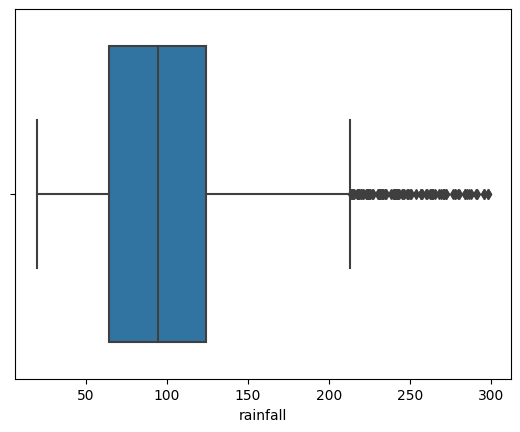

In [18]:
sns.boxplot(x=data['N'])
plt.show()

sns.boxplot(x=data['P'])
plt.show()

sns.boxplot(x=data['K'])
plt.show()

sns.boxplot(x=data['temperature'])
plt.show()

sns.boxplot(x=data['humidity'])
plt.show()

sns.boxplot(x=data['ph'])
plt.show()

sns.boxplot(x=data['rainfall'])
plt.show()

In [47]:
data.drop('label', axis=1, inplace=True)

In [48]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]

In [49]:
data

,N,P,K,temperature,humidity,ph,rainfall
0,90,42.0,43.0,20.879744,82.002744,6.502985,NaN
1,85,58.0,41.0,21.770462,80.319644,7.038096,NaN
2,60,55.0,44.0,23.004459,82.320763,7.840207,NaN
3,74,35.0,40.0,26.491096,80.158363,6.980401,NaN
4,78,42.0,42.0,20.130175,81.604873,7.628473,NaN
...,...,...,...,...,...,...,...
2195,107,34.0,32.0,26.774637,66.413269,6.780064,177.774507
2196,99,15.0,27.0,27.417112,56.636362,6.086922,127.924610
2197,118,33.0,30.0,24.131797,67.225123,6.362608,173.322839
2198,117,32.0,34.0,26.272418,52.127394,6.758793,127.175293


In [50]:
imputer = KNNImputer(n_neighbors=2)
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [35]:
data

,N,P,K,temperature,humidity,ph,rainfall
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,202.935536
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,186.968304
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,178.146874
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,190.261399
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,201.566981
...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293


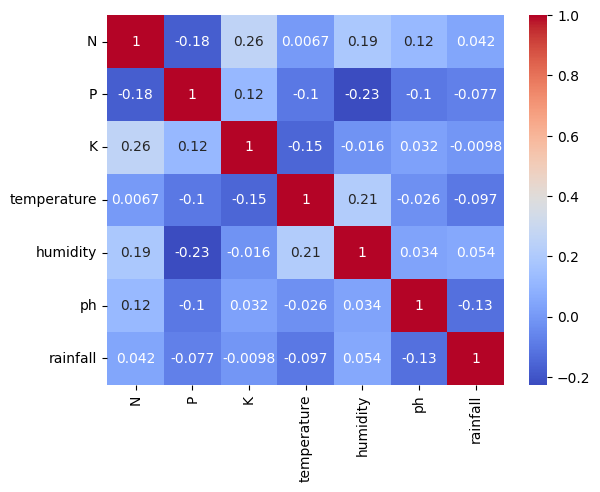

In [28]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [52]:
df = pd.read_csv("/content/drive/MyDrive/Crop_recommendation (1).csv")

data['label'] = pd.Categorical(df['label'])

In [53]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42.0,43.0,20.879744,82.002744,6.502985,192.616830,rice
1,85.0,58.0,41.0,21.770462,80.319644,7.038096,184.880205,rice
2,60.0,55.0,44.0,23.004459,82.320763,7.840207,113.492288,rice
3,74.0,35.0,40.0,26.491096,80.158363,6.980401,190.261399,rice
4,78.0,42.0,42.0,20.130175,81.604873,7.628473,173.852453,rice
...,...,...,...,...,...,...,...,...
2195,107.0,34.0,32.0,26.774637,66.413269,6.780064,177.774507,coffee
2196,99.0,15.0,27.0,27.417112,56.636362,6.086922,127.924610,coffee
2197,118.0,33.0,30.0,24.131797,67.225123,6.362608,173.322839,coffee
2198,117.0,32.0,34.0,26.272418,52.127394,6.758793,127.175293,coffee


In [54]:
X = data.drop('label', axis=1)
y = data['label']

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X, y)

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rfc.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)


In [55]:
feature_importance

,feature,importance
4,humidity,0.217321
6,rainfall,0.212816
2,K,0.153735
1,P,0.129413
0,N,0.119184
3,temperature,0.085841
5,ph,0.081690


In [56]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
data_scaled = pd.concat([X_scaled, y], axis=1)

In [57]:
data_scaled

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.134184,0.545294,-1.100997,0.460350,0.073630,2.050151,rice
1,0.933329,0.586707,0.430547,-0.889158,0.381275,0.870297,1.881463,rice
2,0.255986,0.451540,0.602667,-0.595678,0.475291,2.064469,0.324941,rice
3,0.635298,-0.449574,0.373174,0.233544,0.373698,0.784401,1.998794,rice
4,0.743673,-0.134184,0.487921,-1.279266,0.441658,1.749242,1.641017,rice
...,...,...,...,...,...,...,...,...
2195,1.529390,-0.494630,-0.085812,0.300978,-0.272075,0.486141,1.726533,coffee
2196,1.312641,-1.350688,-0.372679,0.453777,-0.731413,-0.545799,0.639619,coffee
2197,1.827421,-0.539685,-0.200559,-0.327565,-0.233932,-0.135362,1.629470,coffee
2198,1.800327,-0.584741,0.028934,0.181536,-0.943254,0.454473,0.623281,coffee


In [58]:
X = data_scaled.drop('label', axis=1)
y = data_scaled['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
hidden_layer_sizes = [(32,), (64,), (32, 32), (64, 64), (32, 64, 32)]
activation_functions = ['relu', 'tanh', 'logistic']
optimizers = ['adam', 'sgd']
learning_rates = [0.001, 0.01, 0.1]

In [60]:
best_accuracy = 0
best_params = {}

In [62]:
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assuming you have defined hidden_layer_sizes, activation_functions, optimizers, learning_rates
# Also assuming X_train, y_train, X_test, y_test are already defined

best_accuracy = 0
best_model = None
best_params = {}

for layers in hidden_layer_sizes:
    for activation in activation_functions:
        for optimizer in optimizers:
            for learning_rate in learning_rates:
                mlp = MLPClassifier(
                    hidden_layer_sizes=layers,
                    activation=activation,
                    solver=optimizer,
                    learning_rate_init=learning_rate,
                    max_iter=10000,
                    random_state=42
                )
                mlp.fit(X_train, y_train)
                y_pred = mlp.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                print(f"Layers: {layers}, Activation: {activation}, Optimizer: {optimizer}, Learning Rate: {learning_rate}, Accuracy: {accuracy}")

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_model = mlp
                    best_params = {
                        'layers': layers,
                        'activation': activation,
                        'optimizer': optimizer,
                        'learning_rate': learning_rate,
                    }
                    # Save the best model
                    with open('best_mlp_model.pkl', 'wb') as file:
                        pickle.dump(mlp, file)
                    print(f"New best model saved with accuracy: {accuracy}")

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Hyperparameters: {best_params}")

Layers: (32,), Activation: relu, Optimizer: adam, Learning Rate: 0.001, Accuracy: 0.9590909090909091
New best model saved with accuracy: 0.9590909090909091
Layers: (32,), Activation: relu, Optimizer: adam, Learning Rate: 0.01, Accuracy: 0.9545454545454546
Layers: (32,), Activation: relu, Optimizer: adam, Learning Rate: 0.1, Accuracy: 0.9136363636363637
Layers: (32,), Activation: relu, Optimizer: sgd, Learning Rate: 0.001, Accuracy: 0.9159090909090909
Layers: (32,), Activation: relu, Optimizer: sgd, Learning Rate: 0.01, Accuracy: 0.9590909090909091
Layers: (32,), Activation: relu, Optimizer: sgd, Learning Rate: 0.1, Accuracy: 0.9568181818181818
Layers: (32,), Activation: tanh, Optimizer: adam, Learning Rate: 0.001, Accuracy: 0.9568181818181818
Layers: (32,), Activation: tanh, Optimizer: adam, Learning Rate: 0.01, Accuracy: 0.9590909090909091
Layers: (32,), Activation: tanh, Optimizer: adam, Learning Rate: 0.1, Accuracy: 0.9477272727272728
Layers: (32,), Activation: tanh, Optimizer: sgd,

In [64]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9590909090909091


In [65]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9568181818181818


In [66]:
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9431818181818182


In [67]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=10000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9522727272727273


In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9295454545454546


In [69]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9659090909090909


In [70]:
lr = LogisticRegression(penalty='l2', random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9181818181818182


In [71]:
gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9659090909090909


In [63]:
import pickle
import numpy as np

# Load the saved model
filename = 'best_mlp_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Function to make a prediction
def predict_with_model(model, input_features):
    # Convert input data to numpy array
    input_data = np.array([input_features])

    # Make prediction
    prediction = model.predict(input_data)
    return prediction[0]

# Example usage - replace these with the actual features your model expects
# Assume we have 7 features as in your dataset
features = []
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for name in feature_names:
    value = float(input(f"Enter {name}: "))
    features.append(value)

predicted_output = predict_with_model(loaded_model, features)
print(f"The predicted output is: {predicted_output}")

Enter Feature 1: 90
Enter Feature 2: 42
Enter Feature 3: 43
Enter Feature 4: 20.87974
Enter Feature 5: 82.00274
Enter Feature 6: 6.502985
Enter Feature 7: 202.9355
The predicted output is: rice


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
